# **Decision Tree**

If the Dataset is simple, we can draw a line which will predict the data. But if the data is scattered and complex, then the line will not work. We have to split the dataset multiple times to come up with the decision boundaries. That's Where _**Decision Tree**_ is used.

## **DataSet**  

| Company | Job | Degree | Salary_more_then_100k |
|---|---|---|---|
| google | sales executive | bachelors | 0 |
| google | sales executive | masters | 0 |
| google | business manager | bachelors | 1 |
| google | business manager | masters | 1 |
| google | computer programmer | bachelors | 0 |
| google | computer programmer | masters | 1 |
| abc pharma | sales executive | masters | 0 |
| abc pharma | computer programmer | bachelors | 0 |
| abc pharma | business manager | bachelors | 0 |
| abc pharma | business manager | masters | 1 |
| facebook | sales executive | bachelors | 1 |
| facebook | sales executive | masters | 1 |
| facebook | business manager | bachelors | 1 |
| facebook | business manager | masters | 1 |
| facebook | computer programmer | bachelors | 1 |
| facebook | computer programmer | masters | 1 |

#### If we ask a human to predict if the salary is more than 100k, He will split the dataset and try to build the relationship between features. And the human will eventually come up with the following tree like structure:  

![Decision Tree](resources\decision_tree.png)

## **Selection order of Features**  

### **_Company_:**  

If we select the company feature, the ratio of target 1/0 will be:  

- **Facebook:** 6/0 (All 6 entries are yes)  
- **ABC Pharma:** 1/3 (1 yes and 3 no)  
- **Google:** 3/3 (3 yes and 3 no)

This shows the very low entropy of data.  

#### **Entropy:**  

> The randomness of Data

### **_Degree_:**  

If we select the degree feature, the ratio of target (1/0) will be:  

- **Bachelors:** 4/4 (4 yes and 4 no)
- **Master:** 6/2 (6 yes and 2 no)

This shows the high entropy of data.  

## **Information Gain**  

> High Entropy --> Low Information Gain
>
> Low Entropy --> High Information Gain


> We should choose feature with High Information Gain at every split

### **_Gini Impurity_**  

> Little bit of impurity in almost pure dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('resources/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [5]:
inputs = df.drop('salary_more_then_100k', axis = 'columns')
targets = df['salary_more_then_100k']

In [6]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [7]:
targets

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [11]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [17]:
inputs_n = inputs.drop(['company','job','degree'], axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n,targets, test_size = 0.2)

In [21]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
predicted = model.predict(X_test)

In [27]:
y_test

4     0
12    1
14    1
10    1
Name: salary_more_then_100k, dtype: int64

In [28]:
model.score(X_test, y_test)

0.75

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_test, predicted)
cm

array([[0, 1],
       [0, 3]])

Text(95.72222222222221, 0.5, 'Actual')

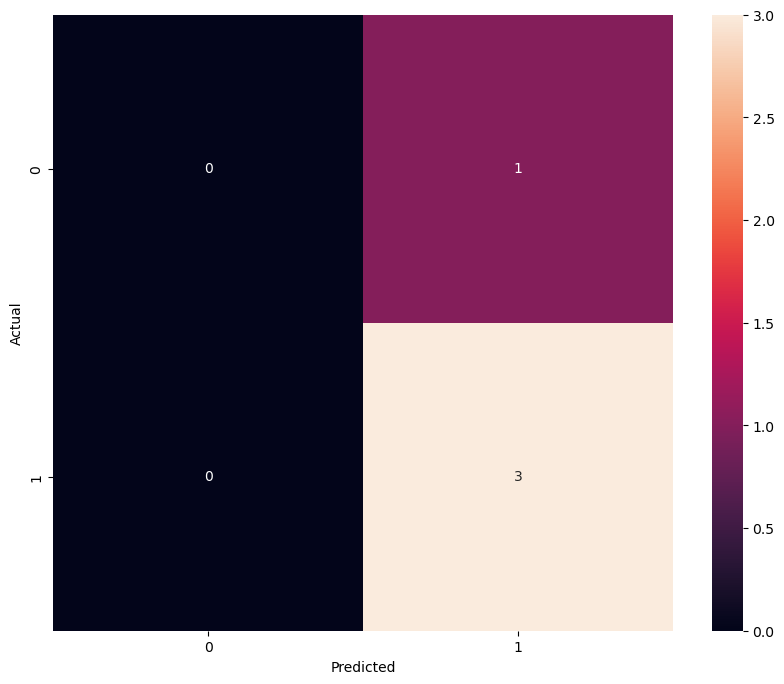

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')